# Initial Requirements to download

In [ ]:
!pip install keras

In [ ]:
!pip install -U scikit-learn #windows
!pip install -U numpy scipy scikit-learn #mac

     |████████████████████████████████| 6.9MB 6.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.4.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


In [ ]:
!pip install seaborn

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Uploading The Dataset

On google colab

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Cardio_Disease1.csv to Cardio_Disease1.csv


on Jupyter Notebook

In [ ]:
#importing the dataset
dataset = pd.read_csv('Cardio_Disease1.csv')
X = dataset.iloc[:,1:12]
y = dataset.iloc[:,12]

## Dataset

In [ ]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#Look for missing data in a dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Feature Selection using feature importance

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  




          Specs        Score
0           age  4209.007957
6   cholesterol  3599.361137
3        weight  2388.777887
7          gluc   562.772977
5         ap_lo   303.629011
4         ap_hi   208.339524
10       active    89.091494
8         smoke    16.790541
2        height     8.197397
1        gender     4.603641
9          alco     3.761355


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


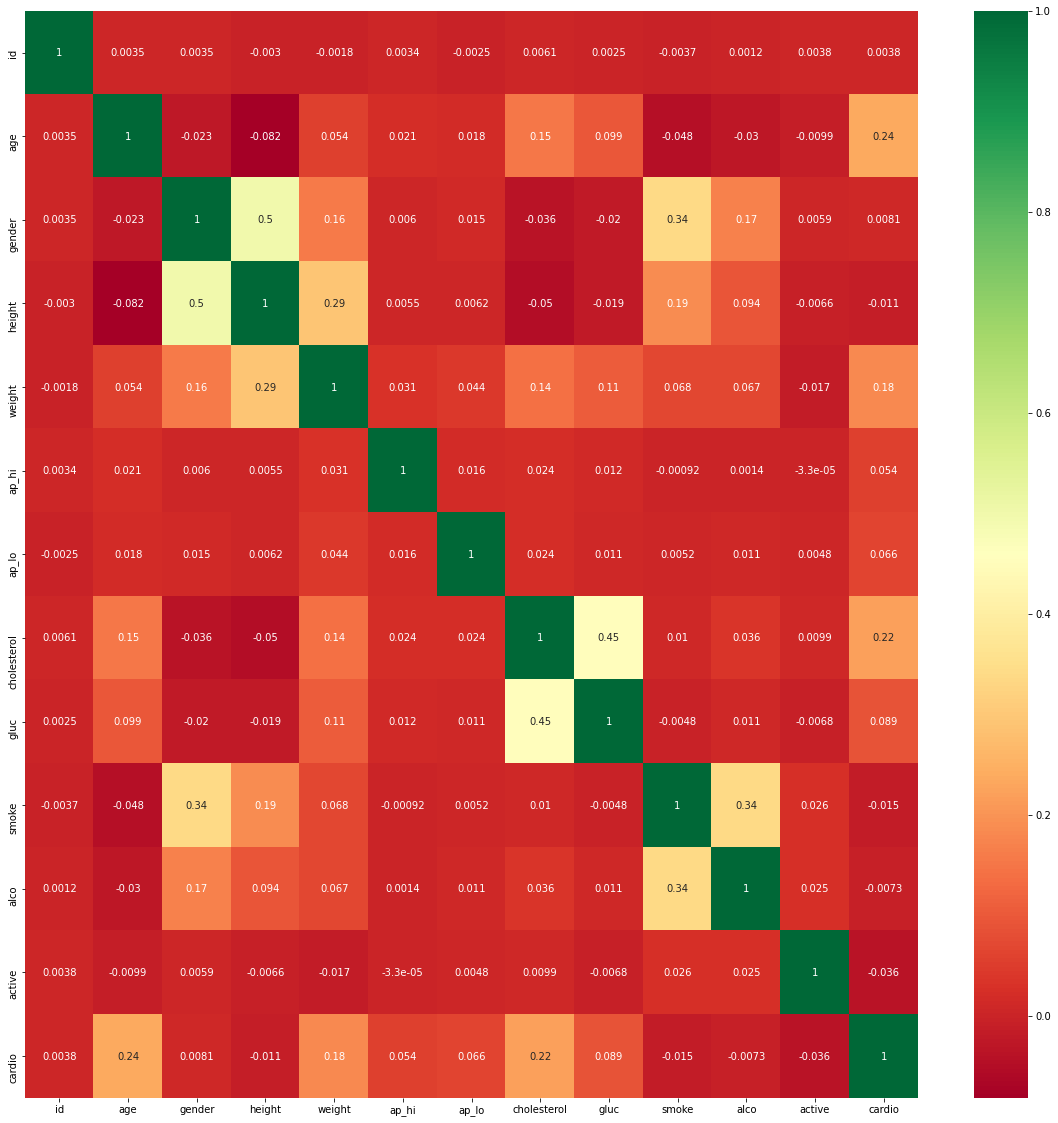

In [ ]:
#get correlations of each features in dataset
import seaborn as sns
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Handling the missing data

In [ ]:


"""from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy="mean")
imputer = imputer.fit(X)
X = imputer.transform(X)
"""




'from sklearn.impute import SimpleImputer\nimputer = SimpleImputer(missing_values= np.nan, strategy="mean")\nimputer = imputer.fit(X)\nX = imputer.transform(X)\n'

As there is no missing value from the information of the dataset we are not using above code

In [ ]:
#Binary Encoding Gender Column
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
X.gender = labelbinarizer.fit_transform(X.gender)

In [ ]:
#Encoding Categorical Data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct1 = ColumnTransformer(transformers = [("cholesterol", OneHotEncoder(), [6])], remainder = 'passthrough')
X = ct1.fit_transform(X)
X = X[:,1:]
ct2 = ColumnTransformer(transformers = [("gluc", OneHotEncoder(), [8])], remainder = 'passthrough')
X = ct2.fit_transform(X)
X = X[:,1:]

In [ ]:
"""Based on the analysis on the feature Selection techniques - We can further divide data
into 3 Categories
1. High Ranked Features - Important Features - Clinincal Data
2. Low Important Features - Less importantn features - Rountine Data
3. Original Data - Full Data"""

"""#Clinincal data - Columns['age','weight', 'ap_hi', 'ap-lo','cholesterol','glusoce' ]
X_H = X[:, [0,1,2,3,4,7,8,9]]

#Daily Routine Data['gender', 'height', 'smoke', 'alcohol','active' ]
X_L = X[:, [5,6,10,11,12]]"""

#Target Data 
y = y.values #As, target data is same for all

#splitting the dataset into training set and test set

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Doing Feature scaling for the dataset

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Prinipal Compenent analaysis

In [ ]:

from sklearn.decomposition import PCA
pca =PCA(n_components = None)
X_trainP = pca.fit_transform(X_train)
X_testP = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [ ]:
explained_variance

array([0.14930852, 0.12404418, 0.10113486, 0.0871239 , 0.07766534,
       0.07603285, 0.07536975, 0.07129416, 0.06093501, 0.05705114,
       0.04859332, 0.03714447, 0.03430249])

In [ ]:
pca =PCA(n_components = 4)
X_trainP = pca.fit_transform(X_train)
X_testP = pca.transform(X_test)

#Linear Discriminannt Analysis

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda =LDA(n_components = 4)
X_trainL = pca.fit_transform(X_train)
X_testL = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predLR = lr_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cmLR = confusion_matrix(y_test, y_predLR)
print(cmLR)

[[5409 1560]
 [2275 4756]]


In [ ]:
accuracyLR = 100*(cmLR[0,0] + cmLR[1,1])/np.sum(cmLR)
print(accuracyLR)

72.60714285714286


# K - Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
KNN_classifier = KNC(n_neighbors = 5, metric = 'minkowski', p=2) #distance metric is taken minikowski which with p=2 works as standard Euclidean Metric
KNN_classifier.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_predKNN = KNN_classifier.predict(X_test)

In [ ]:
#Evaluation
cmKNN = confusion_matrix(y_test, y_predKNN)
print('this is confusion matrix KNN')
print(cmKNN)
accuracyKNN = 100*(cmKNN[0,0] + cmKNN[1,1])/np.sum(cmKNN)
print('accuracy for KNN is ', accuracyKNN)

this is confusion matrix KNN
[[4709 2260]
 [2654 4377]]
accuracy for KNN is  64.9


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predNB = NB_classifier.predict(X_test)

In [ ]:
#Evaluation
cmNB = confusion_matrix(y_test, y_predNB)
print('this is confusion matrix NB')
print(cmNB)
accuracyNB = 100*(cmNB[0,0] + cmNB[1,1])/np.sum(cmNB)
print('accuracy for NB is ', accuracyNB)

this is confusion matrix NB
[[6037  932]
 [4862 2169]]
accuracy for NB is  58.614285714285714


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy')
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predDT = DT_classifier.predict(X_test)

In [ ]:
#Evaluation
cmDT = confusion_matrix(y_test, y_predDT)
print('this is confusion matrix DT')
print(cmDT)
accuracyDT = 100*(cmDT[0,0] + cmDT[1,1])/np.sum(cmDT)
print('accuracy for DT is ', accuracyDT)

this is confusion matrix DT
[[4444 2525]
 [2637 4394]]
accuracy for DT is  63.128571428571426


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 12, criterion = 'entropy')
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predRF = RF_classifier.predict(X_test)

In [ ]:
#Evaluation
cmRF = confusion_matrix(y_test, y_predRF)
print('this is confusion matrix RF')
print(cmRF)
accuracyRF = 100*(cmRF[0,0] + cmRF[1,1])/np.sum(cmRF)
print('accuracy for RF is ', accuracyRF)

this is confusion matrix RF
[[5139 1830]
 [2377 4654]]
accuracy for RF is  69.95


# Artificial Neural Network

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


### Fitting the ANN to the Training set

In [ ]:

history = classifier.fit(X_train, y_train, batch_size = 28, epochs = 50, validation_split=0.1)

Train on 50400 samples, validate on 5600 samples
Epoch 1/50
50400/50400 [==============================] - 9s 186us/step - loss: 0.5969 - accuracy: 0.6932 - val_loss: 0.6032 - val_accuracy: 0.7264
Epoch 2/50
50400/50400 [==============================] - 8s 152us/step - loss: 0.5631 - accuracy: 0.7277 - val_loss: 0.5945 - val_accuracy: 0.7266
Epoch 3/50
50400/50400 [==============================] - 8s 152us/step - loss: 0.5589 - accuracy: 0.7312 - val_loss: 0.5937 - val_accuracy: 0.7287
Epoch 4/50
50400/50400 [==============================] - 8s 154us/step - loss: 0.5570 - accuracy: 0.7306 - val_loss: 0.5869 - val_accuracy: 0.7275
Epoch 5/50
50400/50400 [==============================] - 8s 153us/step - loss: 0.5548 - accuracy: 0.7310 - val_loss: 0.5825 - val_accuracy: 0.7275
Epoch 6/50
50400/50400 [==============================] - 8s 154us/step - loss: 0.5531 - accuracy: 0.7325 - val_loss: 0.5767 - val_accuracy: 0.7275
Epoch 7/50
50400/50400 [==============================] - 8s 15

#Making the predictions and evaluating the model

Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [ ]:
cm

array([[5353, 1678],
       [2009, 4960]])

In [ ]:
accuracy = 100*(cm[0,0] + cm[1,1])/np.sum(cm)
print('accuracy for NN is ', accuracy)

accuracy for NN is  73.66428571428571


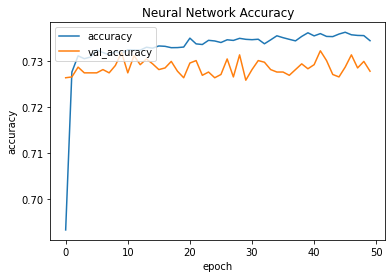

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Neural Network Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc = 'upper left')
plt.show()

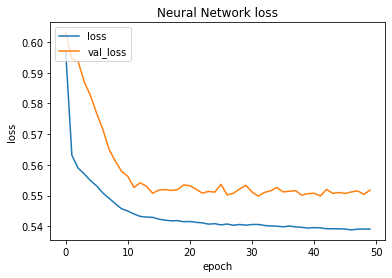

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Neural Network loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'upper left')
plt.show()

# Neural Network for application of PCA & LDA

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
# Fitting the ANN with LDA to the Training set
history = classifier.fit(X_trainL, y_train, batch_size = 28, epochs = 50, validation_split=0.1)

Train on 50400 samples, validate on 5600 samples
Epoch 1/50
50400/50400 [==============================] - 8s 163us/step - loss: 0.6422 - accuracy: 0.6333 - val_loss: 0.6401 - val_accuracy: 0.6439
Epoch 2/50
50400/50400 [==============================] - 8s 157us/step - loss: 0.6336 - accuracy: 0.6432 - val_loss: 0.6379 - val_accuracy: 0.6418
Epoch 3/50
50400/50400 [==============================] - 8s 159us/step - loss: 0.6326 - accuracy: 0.6446 - val_loss: 0.6365 - val_accuracy: 0.6438
Epoch 4/50
50400/50400 [==============================] - 8s 153us/step - loss: 0.6323 - accuracy: 0.6435 - val_loss: 0.6365 - val_accuracy: 0.6432
Epoch 5/50
50400/50400 [==============================] - 8s 154us/step - loss: 0.6321 - accuracy: 0.6429 - val_loss: 0.6365 - val_accuracy: 0.6434
Epoch 6/50
50400/50400 [==============================] - 8s 155us/step - loss: 0.6319 - accuracy: 0.6445 - val_loss: 0.6369 - val_accuracy: 0.6389
Epoch 7/50
50400/50400 [==============================] - 8s 15

In [ ]:
# Fitting the ANN with PCA to the Training set
history = classifier.fit(X_trainP, y_train, batch_size = 28, epochs = 50, validation_split=0.1)

Train on 50400 samples, validate on 5600 samples
Epoch 1/50
50400/50400 [==============================] - 8s 162us/step - loss: 0.6286 - accuracy: 0.6453 - val_loss: 0.6314 - val_accuracy: 0.6473
Epoch 2/50
50400/50400 [==============================] - 8s 162us/step - loss: 0.6286 - accuracy: 0.6451 - val_loss: 0.6313 - val_accuracy: 0.6484
Epoch 3/50
50400/50400 [==============================] - 8s 159us/step - loss: 0.6283 - accuracy: 0.6456 - val_loss: 0.6334 - val_accuracy: 0.6423
Epoch 4/50
50400/50400 [==============================] - 8s 156us/step - loss: 0.6286 - accuracy: 0.6454 - val_loss: 0.6317 - val_accuracy: 0.6486
Epoch 5/50
50400/50400 [==============================] - 8s 158us/step - loss: 0.6285 - accuracy: 0.6458 - val_loss: 0.6324 - val_accuracy: 0.6489
Epoch 6/50
50400/50400 [==============================] - 8s 158us/step - loss: 0.6286 - accuracy: 0.6454 - val_loss: 0.6311 - val_accuracy: 0.6461
Epoch 7/50
50400/50400 [==============================] - 8s 15

# Improving the Neural Network

In [ ]:
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
classifier.add(Dropout(rate = 0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))

# Adding the third hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 28, epochs = 50, validation_split=0.1)

Train on 50400 samples, validate on 5600 samples
Epoch 1/50
50400/50400 [==============================] - 9s 170us/step - loss: 0.6112 - accuracy: 0.6840 - val_loss: 0.5641 - val_accuracy: 0.7261
Epoch 2/50
50400/50400 [==============================] - 9s 170us/step - loss: 0.5794 - accuracy: 0.7210 - val_loss: 0.5579 - val_accuracy: 0.7304
Epoch 3/50
50400/50400 [==============================] - 8s 167us/step - loss: 0.5740 - accuracy: 0.7222 - val_loss: 0.5516 - val_accuracy: 0.7334
Epoch 4/50
50400/50400 [==============================] - 9s 169us/step - loss: 0.5710 - accuracy: 0.7238 - val_loss: 0.5537 - val_accuracy: 0.7298
Epoch 5/50
50400/50400 [==============================] - 8s 167us/step - loss: 0.5664 - accuracy: 0.7252 - val_loss: 0.5493 - val_accuracy: 0.7362
Epoch 6/50
50400/50400 [==============================] - 8s 163us/step - loss: 0.5643 - accuracy: 0.7247 - val_loss: 0.5488 - val_accuracy: 0.7309
Epoch 7/50
50400/50400 [==============================] - 8s 16

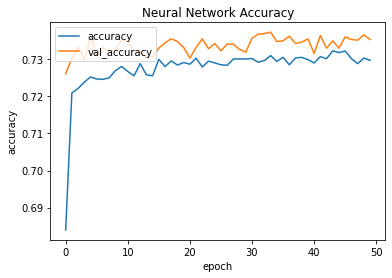

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Neural Network Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc = 'upper left')
plt.show()